## Import Libraries and Data Set

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [20]:
data1 = pd.read_csv("NewspaperData.csv")
data1.head()

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093


In [21]:
data1

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093
5,Chicago Tribune,733.775,1133.249
6,Cincinnati Enquirer,198.832,348.744
7,Denver Post,252.624,417.779
8,Des Moines Register,206.204,344.522
9,Hartford Courant,231.177,323.084


In [22]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Newspaper  34 non-null     object 
 1   daily      34 non-null     float64
 2   sunday     34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 948.0+ bytes


# Correlation

In [23]:
data1["daily"].corr(data1["sunday"])

0.9581543140785462

In [24]:
data1[["daily","sunday"]].corr()

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


In [32]:
data1.corr(numeric_only=True)

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


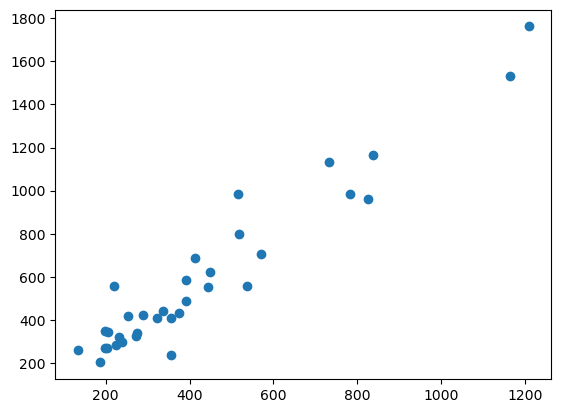

In [26]:
plt.scatter(data1["daily"], data1["sunday"])

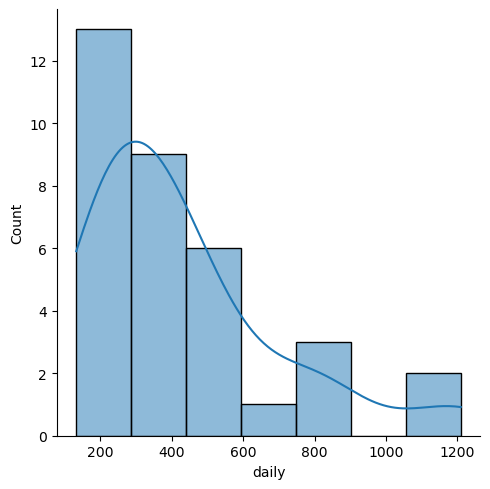

In [27]:
# import seaborn as sns
sns.displot(data1['daily'], kde=True)

C:\Users\shiva\AppData\Local\Temp\ipykernel_11480\2374819401.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1['sunday'], kde = True)


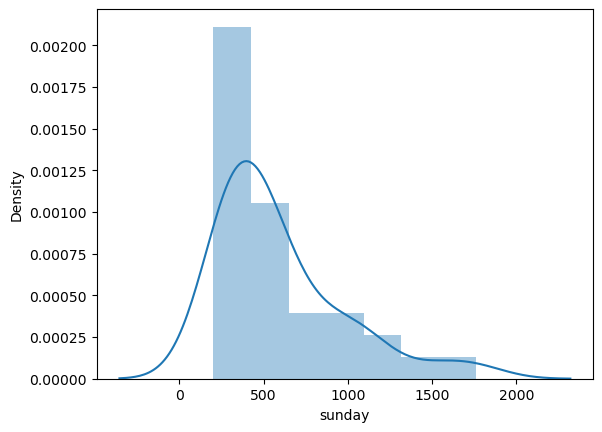

In [28]:
import seaborn as sns
sns.distplot(data1['sunday'], kde = True)
plt.show()

Fitting a Linear Regression Model

In [29]:
import statsmodels.formula.api as smf
model = smf.ols("sunday~daily",data = data1).fit()

In [30]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 sunday   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     358.5
Date:                Tue, 19 Dec 2023   Prob (F-statistic):           6.02e-19
Time:                        08:12:02   Log-Likelihood:                -206.85
No. Observations:                  34   AIC:                             417.7
Df Residuals:                      32   BIC:                             420.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.8356     35.804      0.386      0.702     -59.095      86.766
daily          1.3397      0.071     18.935      0.000       1.196       1.484
==============================================================================
Omnibus:                        3.297   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.192   Jarque-Bera (JB):                1.990
Skew:                           0.396   Prob(JB):                        0.370
Kurtosis:                       3.882   Cond. No.                         965.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

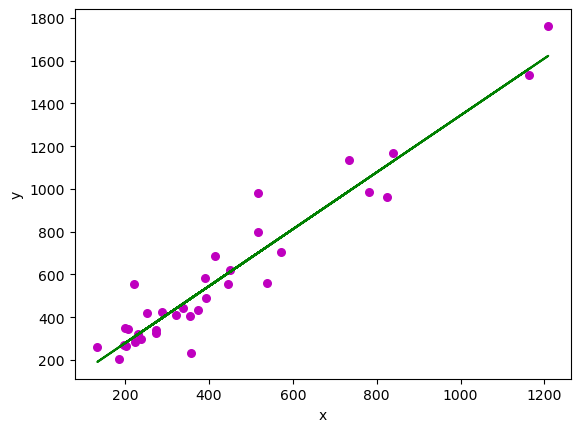

In [31]:
x = data1["daily"].values
y = data1["sunday"].values
plt.scatter(x, y, color = "m", marker = "o", s = 30)
b0 = 13.84
b1 =1.33
# predicted response vector
y_hat = b0 + b1*x
 
# plotting the regression line
plt.plot(x, y_hat, color = "g")
  
# putting labels
plt.xlabel('x')
plt.ylabel('y')
plt.show()

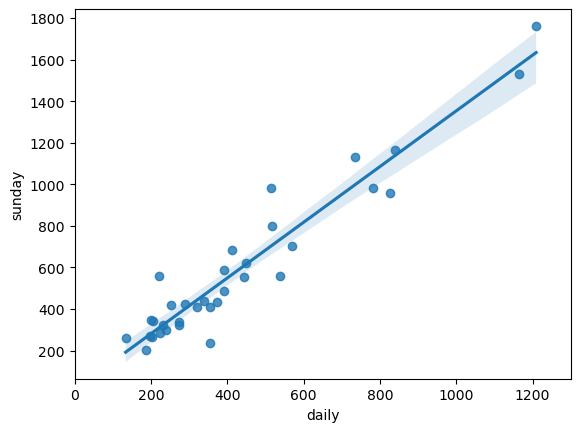

In [32]:
import matplotlib.pyplot as plt
sns.regplot(x="daily", y="sunday", data=data)
plt.xlim([0,1300])
plt.show()

In [14]:
# import numpy as np
# x = np.arange(10)
# plt.plot(2 + 3 *x)
# plt.show()

In [19]:
#Coefficients
model.params

Intercept    13.835630
daily         1.339715
dtype: float64

In [20]:
#1100
#(1.3*1164.388)+13.835630

In [21]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)    
# print(f'model t-values:\n{model.tvalues}\n-----------------\nmodel p-values: \n{model.pvalues}')    

Intercept     0.386427
daily        18.934840
dtype: float64 
 Intercept    7.017382e-01
daily        6.016802e-19
dtype: float64


In [18]:
# predict value for 150,240

In [19]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9180596895873295, 0.9154990548869336)

# Predict for new data point

In [23]:
#Predict for 200 and 300 daily circulation
newdata=pd.Series([200,300,1500])

In [24]:
data_pred=pd.DataFrame(newdata,columns=['daily'])
data_pred

,daily
0,200
1,300
2,1500


In [25]:
model.predict(data_pred)

0     281.778581
1     415.750057
2    2023.407766
dtype: float64

In [23]:
pred = model.predict(data["daily"])
pred

0      538.939509
1      706.442705
2      490.275710
3      333.431284
4      734.307432
5      996.884826
6      280.213795
7      352.279731
8      290.090172
9      323.546868
10     616.379041
11     400.438457
12     262.668890
13    1573.783417
14     609.447357
15     566.965002
16     378.613164
17    1061.219269
18    1633.852208
19    1119.786239
20     313.594128
21     489.224034
22     704.489401
23     309.195844
24     466.219792
25     277.920203
26     192.337885
27     514.901007
28     380.708478
29     777.960698
30     538.047259
31     284.270451
32     444.722729
33    1137.725020
dtype: float64

In [24]:
data["Y_hat"] = pred

In [25]:
data

,Newspaper,daily,sunday,Y_hat
0,Baltimore Sun,391.952,488.506,538.939509
1,Boston Globe,516.981,798.298,706.442705
2,Boston Herald,355.628,235.084,490.275710
3,Charlotte Observer,238.555,299.451,333.431284
4,Chicago Sun Times,537.780,559.093,734.307432
5,Chicago Tribune,733.775,1133.249,996.884826
6,Cincinnati Enquirer,198.832,348.744,280.213795
7,Denver Post,252.624,417.779,352.279731
8,Des Moines Register,206.204,344.522,290.090172
9,Hartford Courant,231.177,323.084,323.546868


In [30]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

In [27]:
mean_absolute_percentage_error(data["daily"],pred)

In [28]:
import numpy as np

In [32]:
MSE = mean_squared_error(data["sunday"],data["Y_hat"])
MSE

11268.692072241503

In [33]:
RMSE = np.sqrt(MSE)

In [34]:
RMSE

106.15409588066541